In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
reviews_df = pd.read_csv('/content/googleplaystore_user_reviews.csv')
apps_df = pd.read_csv('/content/googleplaystore.csv')

In [13]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [14]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## ** BAR GRAPH**

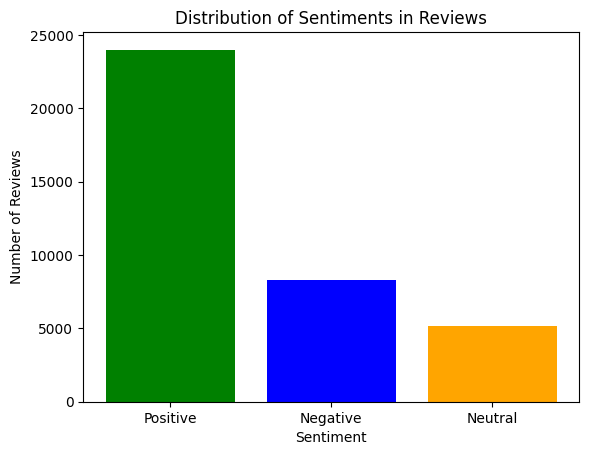

In [15]:

sentiment_counts = reviews_df['Sentiment'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'blue', 'orange', 'red', 'purple'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiments in Reviews')
plt.show()


## Horizontal bar chart

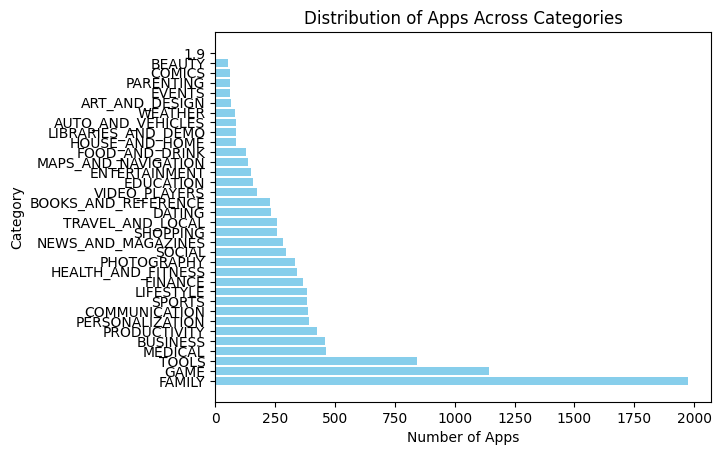

In [16]:

category_counts = apps_df['Category'].value_counts()

plt.barh(category_counts.index, category_counts.values, color='skyblue')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.title('Distribution of Apps Across Categories')
plt.show()


# Scatter plot between Rating and Reviews

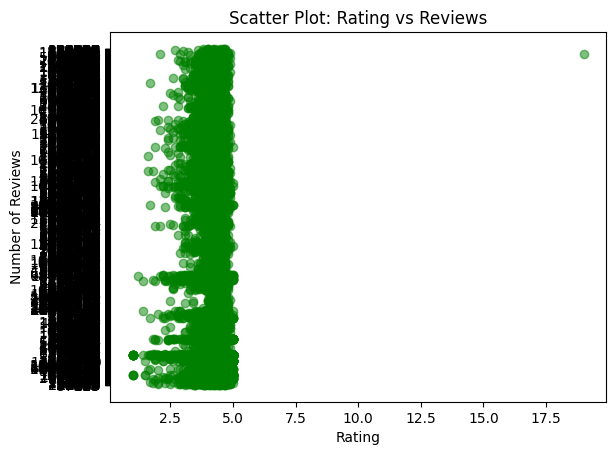

In [17]:

plt.scatter(apps_df['Rating'], apps_df['Reviews'], alpha=0.5, color='green')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Scatter Plot: Rating vs Reviews')
plt.show()


# Pie chart for Content Ratings

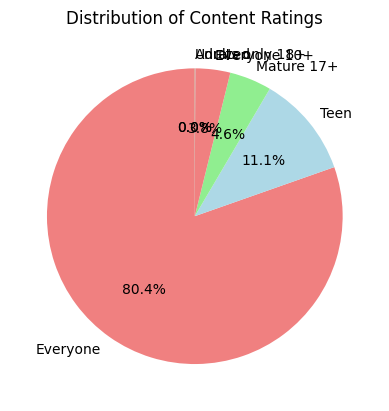

In [18]:

content_rating_counts = apps_df['Content Rating'].value_counts()
plt.pie(content_rating_counts, labels=content_rating_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Distribution of Content Ratings')
plt.show()


## **Box plot for Rating by Category**

<ipython-input-24-a0981b92ad58>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Rating', data=apps_df, palette='viridis')


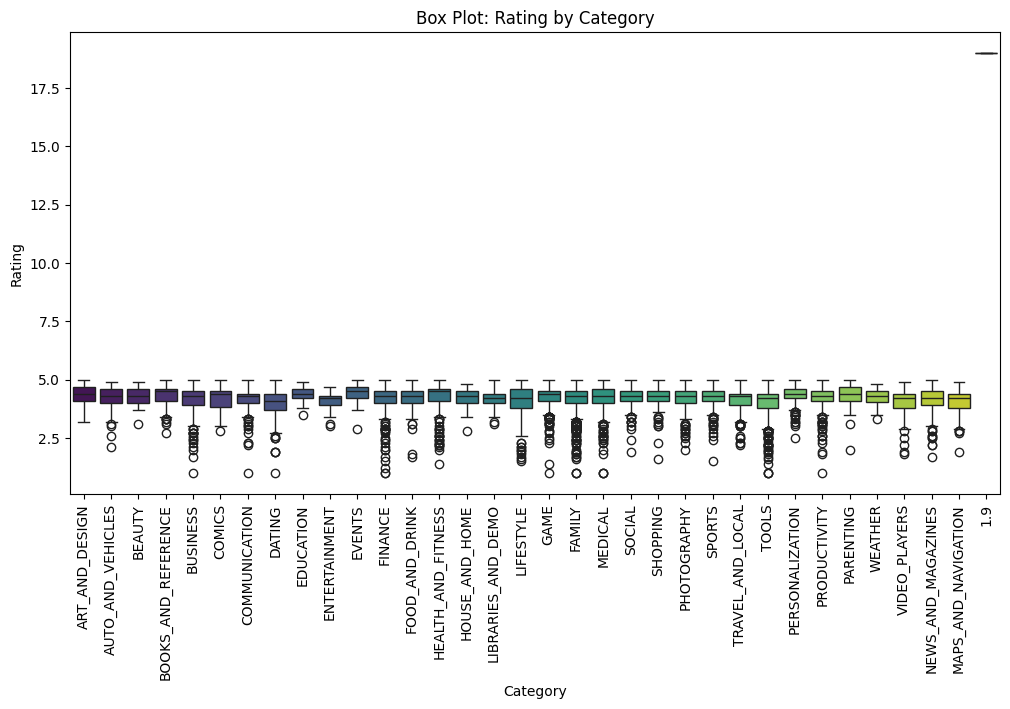

In [24]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Rating', data=apps_df, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Box Plot: Rating by Category')
plt.show()


# Heatmap of correlation matrix



<ipython-input-22-da9b0693e4ac>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combined_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


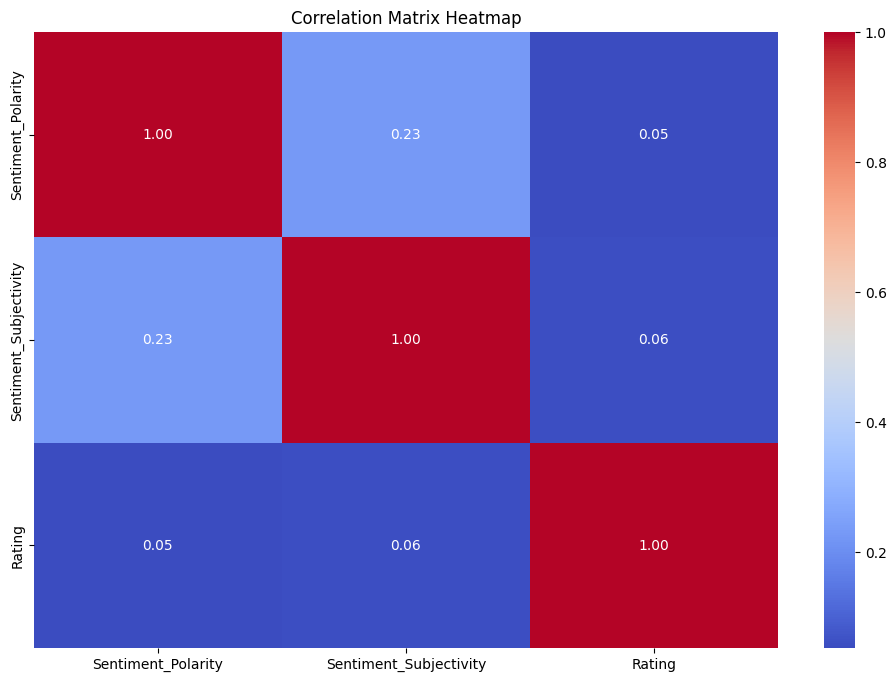

In [22]:

combined_df = pd.merge(reviews_df, apps_df, on='App')
plt.figure(figsize=(12, 8))
sns.heatmap(combined_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


## **WordCloud**

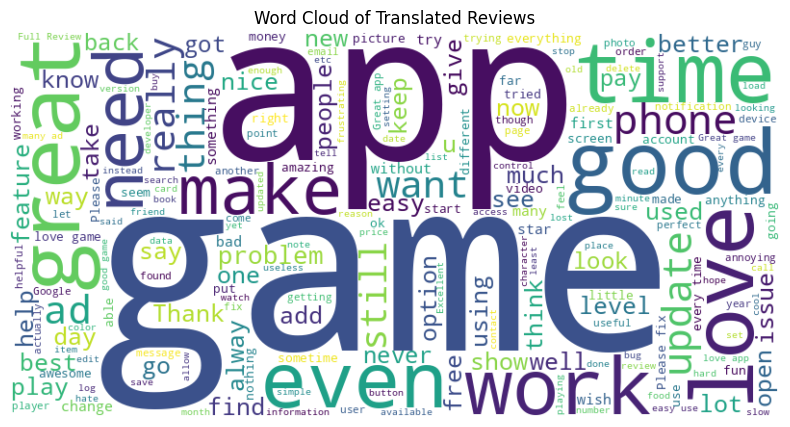

In [27]:
from wordcloud import WordCloud

# Combine all translated reviews into a single string
all_reviews = ' '.join(reviews_df['Translated_Review'].dropna())

# Generate and display a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Translated Reviews')
plt.show()


<ipython-input-29-ca67dbd314e3>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  apps_df['Installs'] = pd.to_numeric(apps_df['Installs'].str.replace(',', '').str.replace('+', ''), errors='coerce').fillna(0).astype(int)


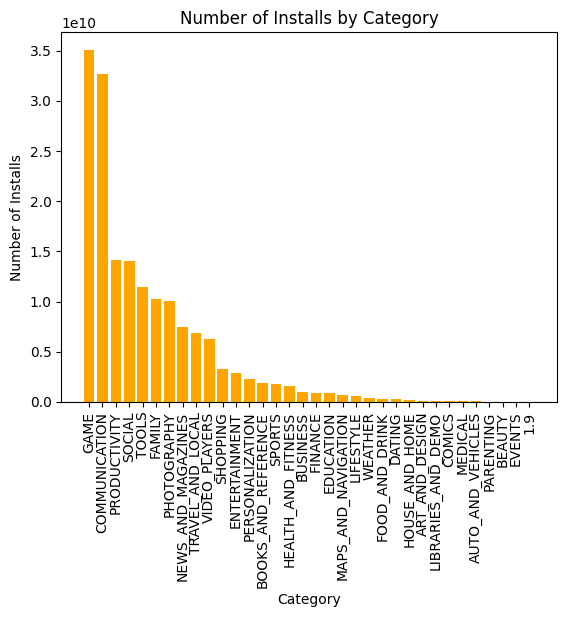

In [29]:
# Convert 'Installs' column to numeric, replacing 'Free' with 0
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'].str.replace(',', '').str.replace('+', ''), errors='coerce').fillna(0).astype(int)

# Bar chart for Number of Installs by Category
install_counts = apps_df.groupby('Category')['Installs'].sum().sort_values(ascending=False)
plt.bar(install_counts.index, install_counts.values, color='orange')
plt.xlabel('Category')
plt.ylabel('Number of Installs')
plt.title('Number of Installs by Category')
plt.xticks(rotation=90)
plt.show()


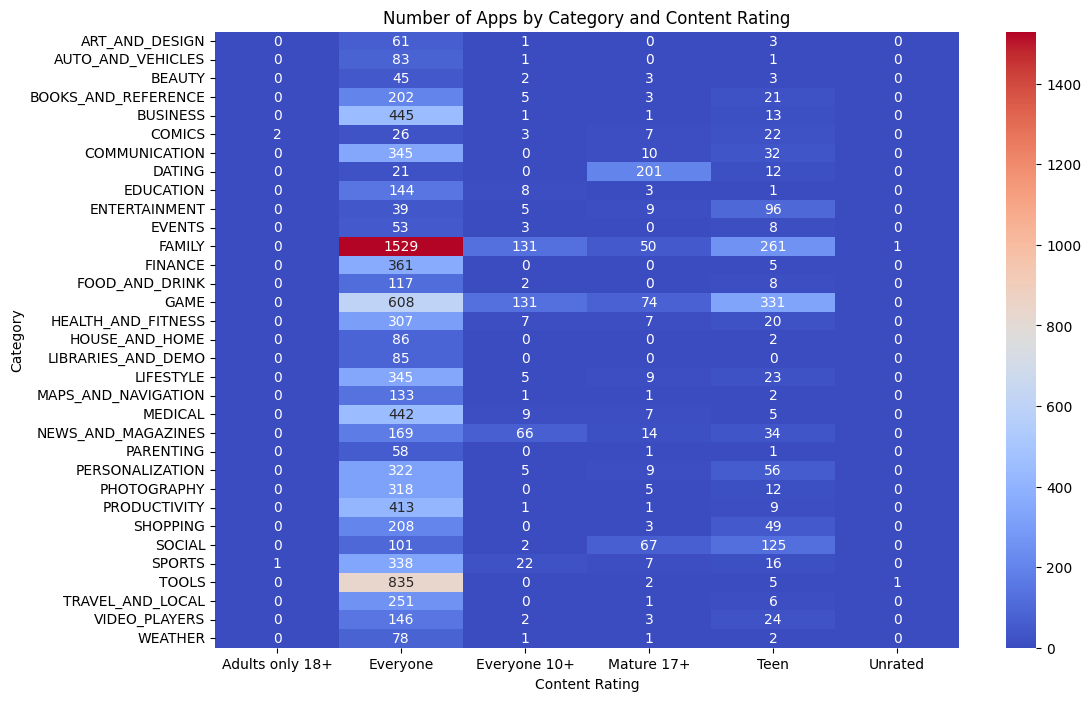

In [34]:

pivot_table = pd.pivot_table(apps_df, index='Category', columns='Content Rating', values='App', aggfunc='count').fillna(0).astype(int)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Number of Apps by Category and Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Category')
plt.show()


In [42]:
dataGrouped = apps_df.groupby("Category").size().reset_index(name="Counts")

minCount = 0.04 * len(apps_df)

for i, row in dataGrouped.iterrows():
    if(row["Counts"] < minCount):
        dataGrouped.at[i, "Category"] = "OTHERS"

dataGrouped = dataGrouped.groupby("Category")["Counts"].sum().reset_index(name="Counts")
dataGrouped = dataGrouped.sort_values("Counts")
print("Grouping completed")

Grouping completed


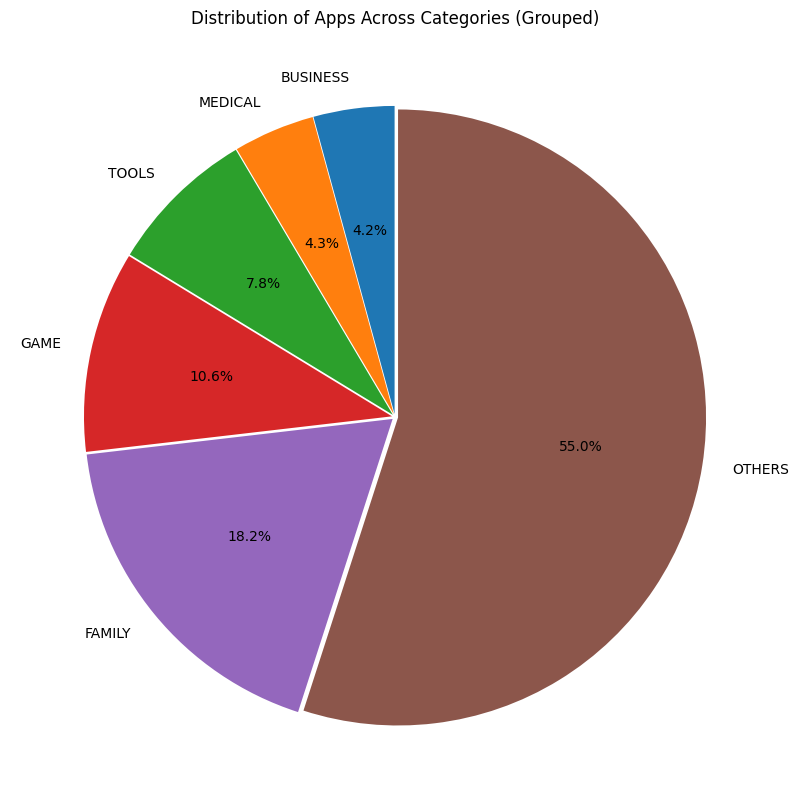

In [47]:
# Group categories with counts below the threshold into "OTHERS"
dataGrouped = apps_df.groupby("Category").size().reset_index(name="Counts")
minCount = 0.04 * len(apps_df)

for i, row in dataGrouped.iterrows():
    if row["Counts"] < minCount:
        dataGrouped.at[i, "Category"] = "OTHERS"

# Aggregate the counts after grouping
dataGrouped = dataGrouped.groupby("Category")["Counts"].sum().reset_index(name="Counts")
dataGrouped = dataGrouped.sort_values("Counts")

# Create a pie chart
fig, ax = plt.subplots(figsize=[10, 10])
explode = [0.01] * len(dataGrouped)
plt.pie(x=dataGrouped["Counts"], explode=explode, autopct="%.1f%%", labels=dataGrouped["Category"], startangle=90)

plt.title('Distribution of Apps Across Categories (Grouped)')
plt.savefig("PieChart_Categories_Grouped.png")
plt.show()


In [54]:
apps_df[apps_df['Genres']=='Tools'].Type.value_counts().index


Index(['Free', 'Paid'], dtype='object')

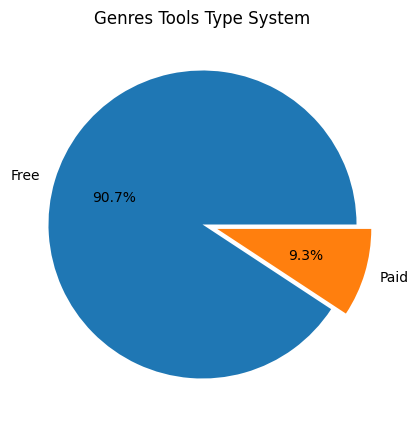

In [56]:
explode=[0,0.1]
labels=["Free","Paid"]
plt.figure(figsize=(5,5))
plt.pie(apps_df[apps_df['Genres']=='Tools'].Type.value_counts().values,labels=apps_df[apps_df['Genres']=='Tools'].Type.value_counts().index,explode=explode, autopct='%1.1f%%')
plt.title("Genres Tools Type System")
plt.show()